# color theme

## a. color list and cmap
---
We often use color in matplotlib in the format of parameters such as (xxx,color = 'red',xxx) or (xxx, c = (0.1,0.1,0.1), xxx) 

[matplotlib colors offical web](https://matplotlib.org/api/colors_api.html)

Matplotlib recognizes the following formats to specify a color:
+ an RGB or RGBA tuple of float values in [0, 1] (e.g., (0.1, 0.2, 0.5) or (0.1, 0.2, 0.5, 0.3));
+ a hex RGB or RGBA string (e.g., '#0f0f0f' or '#0f0f0f80'; case-insensitive);
+ a string representation of a float value in [0, 1] inclusive for gray level (e.g., '0.5');
+ one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
+ a X11/CSS4 color name (case-insensitive);
+ a name from the xkcd color survey, prefixed with 'xkcd:' (e.g., 'xkcd:sky blue'; case insensitive);
+ one of the Tableau Colors from the 'T10' categorical palette (the default color cycle): {'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'} (case-insensitive);
+ a "CN" color spec, i.e. 'C' followed by a number, which is an index into the default property cycle (matplotlib.rcParams['axes.prop_cycle']); the indexing is intended to occur at rendering time, and defaults to black if the cycle does not include color.

I often use CSS4_COLORS names and RGB tuple of float values.
![CSS4_COLORS](./images/named_colors.png)

RGB values can be obtained from softwares such as windows paint of MS offices(need to /255 because float values here in [0, 1]).

---
Another type is color map which is often be used as cmap = XXx, XXX can be a string or array of RGBA.
[colormaps reference link](https://matplotlib.org/examples/color/colormaps_reference.html)

color map themes is shown in the link above.


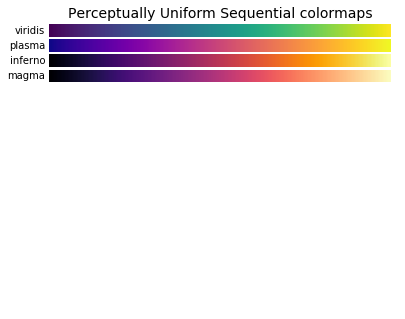

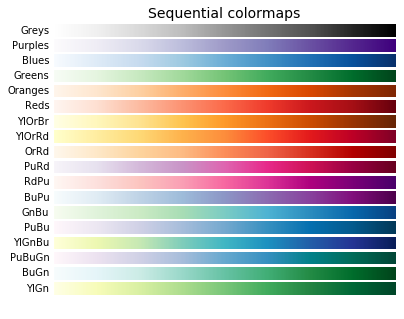

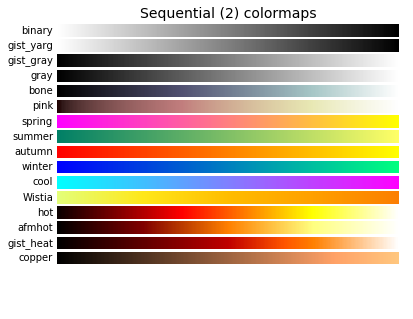

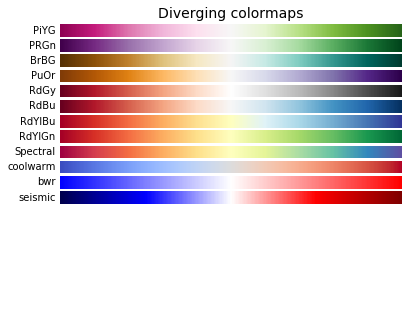

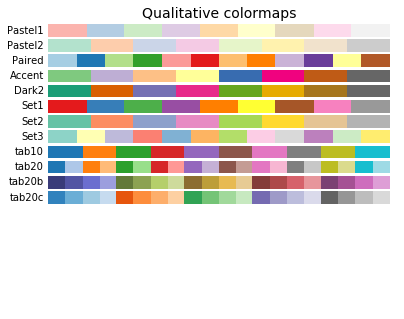

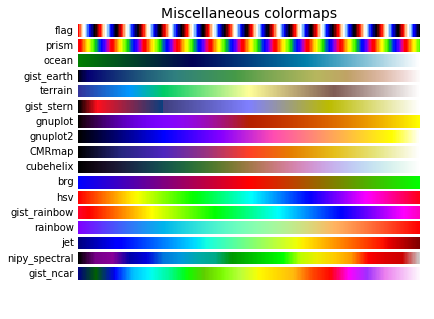

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
#select the cmap category which has most cmap so the height is largest
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))# for imshow
'''
imshow(x)
X : array-like or PIL image
The image data. Supported array shapes are:
(M, N): an image with scalar data. The data is visualized using a colormap.
(M, N, 3): an image with RGB values (float or uint8).
(M, N, 4): an image with RGBA values (float or uint8), i.e. including transparency.
'''

def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)
    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

cmaps have different types:
+ Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

+ Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

+ Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::
        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

In [4]:
print(type(plt.get_cmap('ocean')))#Sequential
print(type(plt.get_cmap('PiYG')))#Diverging
print(type(plt.get_cmap('Set1')))#Qualitative

<class 'matplotlib.colors.LinearSegmentedColormap'>
<class 'matplotlib.colors.LinearSegmentedColormap'>
<class 'matplotlib.colors.ListedColormap'>


For LinearSegmentedColormap cmap can map to x values, but for ListedColormap, if x > number of list(e.x. 9 colors in Set1), there will be some problems.

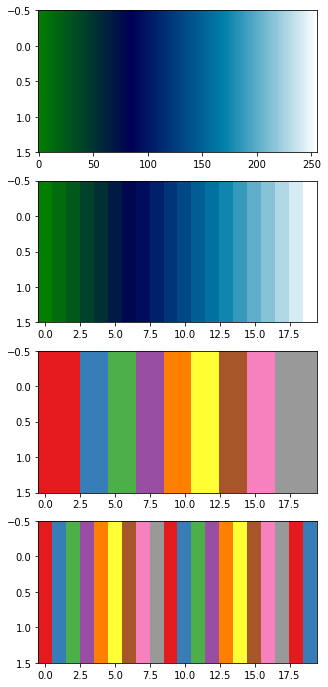

In [5]:
#for a single cmap

#no.1 256 for sequential
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))# for imshow
fig, axes = plt.subplots(nrows = 4,figsize = (5,12))
axes[0].imshow(gradient, aspect='auto', cmap=plt.get_cmap('ocean'))

#no.2 20 for sequential
gradient = np.linspace(0, 1, 20)
gradient = np.vstack((gradient, gradient))# for imshow
axes[1].imshow(gradient, aspect='auto', cmap=plt.get_cmap('ocean'))

#no.3 20 for Set1(9) which is qualitative(listed colormap)
gradient = np.linspace(0, 1, 20)
gradient = np.vstack((gradient, gradient))# for imshow
axes[2].imshow(gradient, aspect='auto', cmap=plt.get_cmap('Set1'))

#no.4 make cmap num equal to X 
color_list = plt.cm.Set1(np.linspace(0, 1, 9))
color_list = np.concatenate((color_list,color_list,color_list[:2]))
cmap = colors.ListedColormap(color_list)

gradient = np.linspace(0, 1, 20)
gradient = np.vstack((gradient, gradient))# for imshow
axes[3].imshow(gradient, aspect='auto', cmap=cmap)
plt.show()


In [6]:
print(color_list)

[[0.89411765 0.10196078 0.10980392 1.        ]
 [0.21568627 0.49411765 0.72156863 1.        ]
 [0.30196078 0.68627451 0.29019608 1.        ]
 [0.59607843 0.30588235 0.63921569 1.        ]
 [1.         0.49803922 0.         1.        ]
 [1.         1.         0.2        1.        ]
 [0.65098039 0.3372549  0.15686275 1.        ]
 [0.96862745 0.50588235 0.74901961 1.        ]
 [0.6        0.6        0.6        1.        ]
 [0.89411765 0.10196078 0.10980392 1.        ]
 [0.21568627 0.49411765 0.72156863 1.        ]
 [0.30196078 0.68627451 0.29019608 1.        ]
 [0.59607843 0.30588235 0.63921569 1.        ]
 [1.         0.49803922 0.         1.        ]
 [1.         1.         0.2        1.        ]
 [0.65098039 0.3372549  0.15686275 1.        ]
 [0.96862745 0.50588235 0.74901961 1.        ]
 [0.6        0.6        0.6        1.        ]
 [0.89411765 0.10196078 0.10980392 1.        ]
 [0.21568627 0.49411765 0.72156863 1.        ]]


By using cmap = colors.ListedColormap(color_list), we can also create our defined cmap.

## b. 3d plot

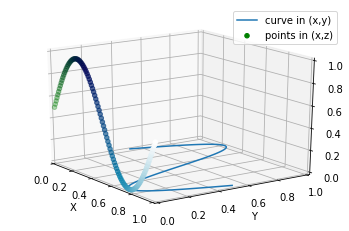

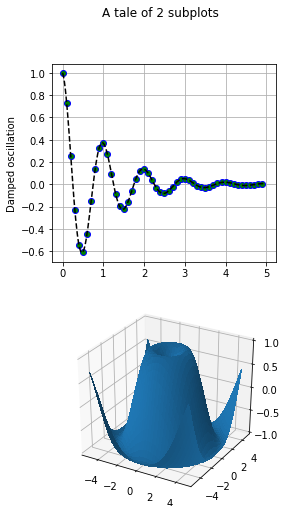

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')

# Plot scatterplot data on the x and z axes.
    
color_list = plt.cm.ocean(np.linspace(0, 1, 100))
    
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=color_list, label='points in (x,z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()


def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return np.multiply(s1, e1)


################
#Another example
################

################
# First subplot
################
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)

# Twice as tall as it is wide.
fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('A tale of 2 subplots')
ax = fig.add_subplot(2, 1, 1)
l = ax.plot(t1, f(t1), 'bo',
            t2, f(t2), 'k--', markerfacecolor='green')
ax.grid(True)
ax.set_ylabel('Damped oscillation')

#################
# Second subplot
#################
ax = fig.add_subplot(2, 1, 2, projection='3d')
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)

ax.set_zlim3d(-1, 1)

plt.show()

# c. animation & gif plot

In [ ]:

"""
animation example 1
"""
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

fig = plt.figure()
ax = p3.Axes3D(fig)

def gen(n):
    phi = 0
    while phi < 2*np.pi:
        yield np.array([np.cos(phi), np.sin(phi), phi])
        phi += 2*np.pi/n

def update(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

N = 100
data = np.array(list(gen(N))).T
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])

# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)
ani.save('matplot001.gif', writer='pillow')
plt.show()

"""
animation example 2
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r-', animated=False)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()
ani.save('matplot002.gif', writer='pillow')


"""
animation example 3
"""

fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)
l = ax.plot(x, y)
dot, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return l

def gen_dot():
    for i in np.linspace(0, 2*np.pi, 200):
        newdot = [i, np.sin(i)]
        yield newdot

def update_dot(newd):
    dot.set_data(newd[0], newd[1])
    return dot,

ani = animation.FuncAnimation(fig, update_dot, frames = gen_dot(), interval = 100, init_func=init)
ani.save('matplot003.gif', writer='pillow', fps=30)


"""
animation example 4
"""
from math import sin, cos
from scipy.integrate import odeint
g = 9.8
leng = 1.0
b_const = 0.2

# no decay case:
def pendulum_equations1(w, t, l):
    th, v = w
    dth = v
    dv  = - g/l * sin(th)
    return dth, dv

# the decay exist case:
def pendulum_equations2(w, t, l, b):
    th, v = w
    dth = v
    dv = -b/l * v - g/l * sin(th)
    return dth, dv

t = np.arange(0, 20, 0.1)
track = odeint(pendulum_equations1, (1.0, 0), t, args=(leng,))
#track = odeint(pendulum_equations2, (1.0, 0), t, args=(leng, b_const))
xdata = [leng*sin(track[i, 0]) for i in range(len(track))]
ydata = [-leng*cos(track[i, 0]) for i in range(len(track))]

fig, ax = plt.subplots()
ax.grid()
line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    time_text.set_text('')
    return line, time_text

def update(i):
    newx = [0, xdata[i]]
    newy = [0, ydata[i]]
    line.set_data(newx, newy)
    time_text.set_text(time_template %(0.1*i))
    return line, time_text

ani = animation.FuncAnimation(fig, update, range(1, len(xdata)), init_func=init, interval=50)
#ani.save('single_pendulum_decay.gif', writer='imagemagick', fps=100)
ani.save('matplot004.gif', writer='pillow', fps=100)
plt.show()

'''
　　a.fig 绘制动图的画布名称

　　b.func自定义动画函数，即下边程序定义的函数update

　　c.frames动画长度，一次循环包含的帧数，在函数运行时，其值会传递给函数update(n)的形参“n”

　　d.init_func自定义开始帧，即传入刚定义的函数init,初始化函数

　　e.interval更新频率，以ms计

　　f.blit选择更新所有点，还是仅更新产生变化的点。应选择True，但mac用户请选择False，否则无法显
'''